In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

In [2]:
def plot_polygon(vx):
    vx = list(np.copy(vx))
    vx.append(vx[0])
    vx = np.array(vx)
    plt.plot(vx.T[0], vx.T[1])
    plt.scatter(np.array(vx).T[0], np.array(vx).T[1])
    
def r_points(vx, r=1):
    v_new_1 = [(vx[0][0] + r*vx[1][0]) / (1 + r), (vx[0][1] + r*vx[1][1])/(1 + r)]
    v_new_2 = [(vx[1][0] + r*vx[2][0]) / (1 + r), (vx[1][1] + r*vx[2][1])/(1 + r)]
    v_new_3 = [(vx[2][0] + r*vx[0][0]) / (1 + r), (vx[2][1] + r*vx[0][1])/(1 + r)]
    return [v_new_1, v_new_2, v_new_3]

def section_point(p0, p1, r=1):
    return [(p0[0] + r*p1[0]) / (1 + r), (p0[1] + r*p1[1]) / (1 + r)]

def higher_point(vx):
    idxs = np.where( np.array(vx).T[1] == max(np.array(vx).T[1]) )[0]
    print(idxs)
    return [vx[i] for i in idxs ]

# Random Sierpinski triangle

In [10]:
v0 = [[1,1], [4,4], [7,1]]
vs = []
p0 = [2,2]
N  = 30000
r  = 1

for _ in range(N):
    random_v = v0[np.random.choice(range(len(v0)))]
    r_point  = section_point(p0=p0, p1=random_v, r=r)
    vs.append(r_point)
    p0 = r_point

<IPython.core.display.Javascript object>


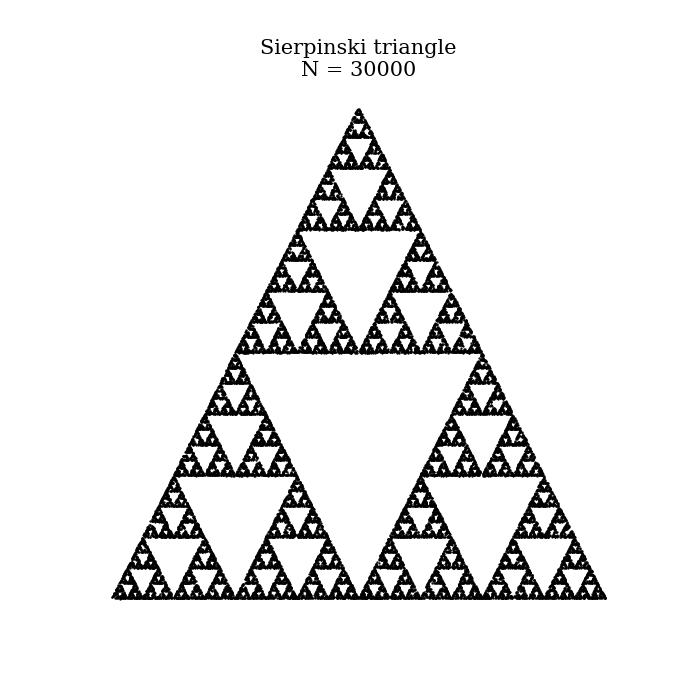

In [13]:
idx    = 0
step   = 1000
frames = int(len(vs)/step) 

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 15}

fig = plt.figure(figsize=(7,7))
def init_function():
    return plt.scatter(x=np.array(v0).T[0], y=np.array(v0).T[1], s=2, c="black")

def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs).T[0][0:idx], y=np.array(vs).T[1][0:idx], s=0.4, c="black")
    plt.axis("off")
    plt.title("Sierpinski triangle\nN = %.i"%(idx+step), fontdict=font_title)
    idx+=step
    #plt.show()
    
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

In [ ]:
len(vs)

In [ ]:
vs